# Basic Metaheuristic Algorithms

Grid search, random search, and coordiante descent are all examples of metaheuristic algorithms. They are all
1. Strategies to guide the search process
2. Efficiently explore the search space
3. Approximate and non-deterministic
4. Not problem specific

But as we know, there are reasons why grid search and random search is bad and so, we may want to use more advanced methods like coordinate descent. But as we will see in this tutorial, and seen in previous tutorials, there are issues that come with coordiante descent with this.

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import f1_score

In [ ]:
wage = pd.read_csv('Wage.csv')

wage['high_earner'] = wage['wage'] > 250
wage.drop(columns='wage', inplace=True)

wage = pd.get_dummies(wage)

In [ ]:
wage.shape

(3000, 23)

In [ ]:
train_valid_indices, test_indices = train_test_split(np.array(wage.index), test_size=0.2, 
                                                     stratify=wage['high_earner'], random_state=0)

train_valid_wage = wage.loc[train_valid_indices].copy()
test_wage = wage.loc[test_indices].copy()

In [ ]:
train_indices, valid_indices = train_test_split(np.arange(len(train_valid_wage)), test_size=0.2, stratify=train_valid_wage['high_earner'], random_state=0)

In [ ]:
print("Train Length:", len(train_indices))
print("Valid Length:", len(valid_indices))
print("Test Length:", len(test_indices))

Train Length: 1920
Valid Length: 480
Test Length: 600


In [ ]:
x_train_valid = wage.drop('high_earner', axis=1).loc[train_valid_indices]
x_test = wage.drop('high_earner', axis=1).loc[test_indices]

y_train_valid = wage.loc[train_valid_indices, 'high_earner'].copy()
y_test = wage.loc[test_indices, 'high_earner'].copy()

As a note, since this dataset is so small it might be a good idea to use CV when scoring the models. But I'm going to use validation split anyways

# Random Forests

### Tutorial Solutions

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
wage_tutorial = pd.read_csv('Wage.csv')
wage_tutorial['high_earner'] = wage_tutorial['wage'] > 250
wage_tutorial.drop(columns='wage', inplace=True)

wage_tutorial = pd.get_dummies(wage_tutorial)

train_indices_tutorial, test_indices_tutorial = train_test_split(np.array(wage_tutorial.index), test_size=0.2, 
                                                                 stratify=wage_tutorial['high_earner'], random_state=0)

wage_tutorial_train = wage_tutorial.loc[train_indices_tutorial].copy()
wage_tutorial_test = wage_tutorial.loc[test_indices_tutorial].copy()

In [ ]:
%%time

parameters = {'min_samples_leaf': np.arange(1, 50),
              'max_features': np.arange(1, len(wage_tutorial_train.columns))} # We subtract 1 as it still contains high_earner

random_search = RandomizedSearchCV(RandomForestClassifier(criterion='entropy', random_state=0),
                                   parameters, n_iter=20, cv=5,
                                   scoring='f1', random_state=0)

model = random_search.fit(wage_tutorial_train.drop(columns='high_earner'), wage_tutorial_train['high_earner'])

print(random_search.best_params_)

{'min_samples_leaf': 44, 'max_features': 5}
CPU times: user 22.4 s, sys: 122 ms, total: 22.5 s
Wall time: 22.5 s


### Using Coordinate Descent

In [ ]:
parameter_grid = {'min_samples_leaf': np.arange(1, 50),
                  'max_features': np.arange(1, len(x_train_valid.columns))}

base_parameters = {key: np.random.choice(val) for key, val in parameter_grid.items()}
print(base_parameters)

{'min_samples_leaf': 32, 'max_features': 19}


In [ ]:
%%time

print(base_parameters)
for parameter, grid in parameter_grid.items():
    base_model = RandomForestClassifier(criterion='entropy', random_state=0, **base_parameters)
    
    parameter_sub_grid = {parameter: grid}
    search = GridSearchCV(base_model, parameter_sub_grid, 
                          cv=[(train_indices, valid_indices)], 
                          scoring="f1", verbose=3, refit=False)
    
    search.fit(x_train_valid, y_train_valid)
    
    base_parameters.update(search.best_params_)
    print(base_parameters)

{'min_samples_leaf': 32, 'max_features': 19}
Fitting 1 folds for each of 49 candidates, totalling 49 fits
[CV 1/1] END ................min_samples_leaf=1;, score=0.133 total time=   0.3s
[CV 1/1] END ................min_samples_leaf=2;, score=0.000 total time=   0.3s
[CV 1/1] END ................min_samples_leaf=3;, score=0.000 total time=   0.3s
[CV 1/1] END ................min_samples_leaf=4;, score=0.000 total time=   0.3s
[CV 1/1] END ................min_samples_leaf=5;, score=0.000 total time=   0.3s
[CV 1/1] END ................min_samples_leaf=6;, score=0.000 total time=   0.3s
[CV 1/1] END ................min_samples_leaf=7;, score=0.000 total time=   0.3s
[CV 1/1] END ................min_samples_leaf=8;, score=0.000 total time=   0.3s
[CV 1/1] END ................min_samples_leaf=9;, score=0.000 total time=   0.3s
[CV 1/1] END ...............min_samples_leaf=10;, score=0.000 total time=   0.3s
[CV 1/1] END ...............min_samples_leaf=11;, score=0.000 total time=   0.3s
[CV

In [ ]:
%%time 

print(base_parameters)
for parameter, grid in parameter_grid.items():
    base_model = RandomForestClassifier(criterion='entropy', random_state=0, **base_parameters)
    
    parameter_sub_grid = {parameter: grid}
    search = GridSearchCV(base_model, parameter_sub_grid, 
                          cv=[(train_indices, valid_indices)], 
                          scoring="f1", verbose=3, refit=False)
    
    search.fit(x_train_valid, y_train_valid)
    
    base_parameters.update(search.best_params_)
    print(base_parameters)

{'min_samples_leaf': 1, 'max_features': 1}
Fitting 1 folds for each of 49 candidates, totalling 49 fits
[CV 1/1] END ................min_samples_leaf=1;, score=0.235 total time=   0.2s
[CV 1/1] END ................min_samples_leaf=2;, score=0.000 total time=   0.2s
[CV 1/1] END ................min_samples_leaf=3;, score=0.000 total time=   0.2s
[CV 1/1] END ................min_samples_leaf=4;, score=0.000 total time=   0.2s
[CV 1/1] END ................min_samples_leaf=5;, score=0.000 total time=   0.2s
[CV 1/1] END ................min_samples_leaf=6;, score=0.000 total time=   0.2s
[CV 1/1] END ................min_samples_leaf=7;, score=0.000 total time=   0.2s
[CV 1/1] END ................min_samples_leaf=8;, score=0.000 total time=   0.2s
[CV 1/1] END ................min_samples_leaf=9;, score=0.000 total time=   0.2s
[CV 1/1] END ...............min_samples_leaf=10;, score=0.000 total time=   0.2s
[CV 1/1] END ...............min_samples_leaf=11;, score=0.000 total time=   0.2s
[CV 1

I just want to take a second here to just compare the differences between random search & coordinate descent, as well as cross-validation vs validation. First we can see that random search with `cv=5` took around 22 seconds to run, while coordinate descent with simple validation approach took 20 seconds for the first iteration and 40 seconds in total. 

But the result of coordinate descent gives the exact best parameters when compared with grid search:

### Compare with GridSearch over all params

In [ ]:
%%time

base_model = RandomForestClassifier(criterion='entropy', random_state=0)

search = GridSearchCV(base_model, parameter_grid, 
                      cv=[(train_indices, valid_indices)], 
                      scoring="f1", verbose=0, refit=False)

search.fit(x_train_valid, y_train_valid)

CPU times: user 3min 56s, sys: 1.25 s, total: 3min 58s
Wall time: 3min 57s


In [ ]:
print("Best Parameters as found via Grid Search")
print(search.best_params_)

Best Parameters as found via Grid Search
{'max_features': 1, 'min_samples_leaf': 1}


Amazing, the exact same as coordinate descent! Recall, in grid search we are searching through $21\times49=1029$ models, taking 4 minutes. But coordinate descent only required $2\times(21 + 49)=140$ models, taking 40 seconds in total!

# RandomForest with `class_weight`

In [ ]:
parameter_grid = {'min_samples_leaf': np.arange(1, 50),
                  'max_features': np.arange(1, len(x_train_valid.columns)),
                  'class_weight': ['balanced', 'balanced_subsample']}

base_parameters = {key: np.random.choice(val) for key, val in parameter_grid.items()}
print(base_parameters)

{'min_samples_leaf': 37, 'max_features': 14, 'class_weight': 'balanced_subsample'}


In [ ]:
%%time

print(base_parameters)
for parameter, grid in parameter_grid.items():
    base_model = RandomForestClassifier(criterion='entropy', random_state=0, **base_parameters)
    
    parameter_sub_grid = {parameter: grid}
    search = GridSearchCV(base_model, parameter_sub_grid, 
                          cv=[(train_indices, valid_indices)], 
                          scoring="f1", verbose=3, refit=False)
    
    search.fit(x_train_valid, y_train_valid)
    
    base_parameters.update(search.best_params_)
    print(base_parameters)

{'min_samples_leaf': 37, 'max_features': 14, 'class_weight': 'balanced_subsample'}
Fitting 1 folds for each of 49 candidates, totalling 49 fits
[CV 1/1] END ................min_samples_leaf=1;, score=0.118 total time=   0.4s
[CV 1/1] END ................min_samples_leaf=2;, score=0.174 total time=   0.4s
[CV 1/1] END ................min_samples_leaf=3;, score=0.267 total time=   0.4s
[CV 1/1] END ................min_samples_leaf=4;, score=0.316 total time=   0.4s
[CV 1/1] END ................min_samples_leaf=5;, score=0.279 total time=   0.3s
[CV 1/1] END ................min_samples_leaf=6;, score=0.267 total time=   0.3s
[CV 1/1] END ................min_samples_leaf=7;, score=0.286 total time=   0.3s
[CV 1/1] END ................min_samples_leaf=8;, score=0.231 total time=   0.3s
[CV 1/1] END ................min_samples_leaf=9;, score=0.212 total time=   0.3s
[CV 1/1] END ...............min_samples_leaf=10;, score=0.194 total time=   0.3s
[CV 1/1] END ...............min_samples_leaf=1

In [ ]:
%%time

print(base_parameters)
for parameter, grid in parameter_grid.items():
    base_model = RandomForestClassifier(criterion='entropy', random_state=0, **base_parameters)
    
    parameter_sub_grid = {parameter: grid}
    search = GridSearchCV(base_model, parameter_sub_grid, 
                          cv=[(train_indices, valid_indices)], 
                          scoring="f1", verbose=3, refit=False)
    
    search.fit(x_train_valid, y_train_valid)
    
    base_parameters.update(search.best_params_)
    print(base_parameters)

{'min_samples_leaf': 4, 'max_features': 17, 'class_weight': 'balanced_subsample'}
Fitting 1 folds for each of 49 candidates, totalling 49 fits
[CV 1/1] END ................min_samples_leaf=1;, score=0.118 total time=   0.4s
[CV 1/1] END ................min_samples_leaf=2;, score=0.182 total time=   0.4s
[CV 1/1] END ................min_samples_leaf=3;, score=0.286 total time=   0.4s
[CV 1/1] END ................min_samples_leaf=4;, score=0.353 total time=   0.4s
[CV 1/1] END ................min_samples_leaf=5;, score=0.300 total time=   0.4s
[CV 1/1] END ................min_samples_leaf=6;, score=0.279 total time=   0.4s
[CV 1/1] END ................min_samples_leaf=7;, score=0.250 total time=   0.4s
[CV 1/1] END ................min_samples_leaf=8;, score=0.250 total time=   0.4s
[CV 1/1] END ................min_samples_leaf=9;, score=0.241 total time=   0.4s
[CV 1/1] END ...............min_samples_leaf=10;, score=0.206 total time=   0.4s
[CV 1/1] END ...............min_samples_leaf=11

### Compare with GridSearch

In [ ]:
%%time

base_model = RandomForestClassifier(criterion='entropy', random_state=0)

search = GridSearchCV(base_model, parameter_grid, 
                      cv=[(train_indices, valid_indices)], 
                      scoring="f1", verbose=0, refit=False)

search.fit(x_train_valid, y_train_valid)

CPU times: user 9min, sys: 3 s, total: 9min 3s
Wall time: 9min 3s


In [ ]:
print(search.best_params_)

{'class_weight': 'balanced_subsample', 'max_features': 8, 'min_samples_leaf': 3}


So not the same, but pretty close.

# Gradient Boosting

I never really understood why they did this, but it is a horrible idea to use low number of estimators when doing gradient boosting. Gradient boosting is basically the exact same as gradient descent. As we know from gradient descent, it is a good idea to be using multiple steps, not just one. 

This is the original parameter grid they suggest
```
parameter_grid = {'loss': ['deviance', 'exponential'],
                  'n_estimators': np.arange(1, 200),
                  'learning_rate': np.linspace(0.1, 1, 10),
                  'max_depth': np.arange(1, 100),
                  'subsample': np.linspace(0.5, 1.0, 6)}
```

Instead we will do this
```
parameter_grid = {'loss': ['deviance', 'exponential'],
                  'n_estimators': np.arange(100, 200 + 1, 20),
                  'learning_rate': np.linspace(0.1, 1, 10),
                  'max_depth': np.arange(1, 100, 5),
                  'subsample': np.linspace(0.1, 1.0, 10)}
```
Importantly, we reduce the number of parameters we search through

In [4]:
np.arange(100, 200 + 1, 20)

array([100, 120, 140, 160, 180, 200])

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
parameter_grid = {'loss': ['deviance', 'exponential'],
                  'n_estimators': np.arange(100, 200 + 1, 20),
                  'learning_rate': np.linspace(0.1, 1, 10),
                  'max_depth': np.arange(1, 100, 5),
                  'subsample': np.linspace(0.1, 1.0, 10)}

base_parameters = {key: np.random.choice(val) for key, val in parameter_grid.items()}
print(base_parameters)

{'loss': 'deviance', 'n_estimators': 140, 'learning_rate': 0.7000000000000001, 'max_depth': 31, 'subsample': 0.4}


In [ ]:
%%time

print(base_parameters)
for parameter, grid in parameter_grid.items():
    base_model = GradientBoostingClassifier(random_state=0, **base_parameters)
    
    parameter_sub_grid = {parameter: grid}
    search = GridSearchCV(base_model, parameter_sub_grid, 
                          cv=[(train_indices, valid_indices)], 
                          scoring="f1", verbose=3, refit=False)
    
    search.fit(x_train_valid, y_train_valid)
    
    base_parameters.update(search.best_params_)
    print(base_parameters)

{'loss': 'deviance', 'n_estimators': 140, 'learning_rate': 0.7000000000000001, 'max_depth': 31, 'subsample': 0.4}
Fitting 1 folds for each of 2 candidates, totalling 2 fits
[CV 1/1] END .....................loss=deviance;, score=0.207 total time=   0.6s
[CV 1/1] END ..................loss=exponential;, score=0.143 total time=   0.6s
{'loss': 'deviance', 'n_estimators': 140, 'learning_rate': 0.7000000000000001, 'max_depth': 31, 'subsample': 0.4}
Fitting 1 folds for each of 6 candidates, totalling 6 fits
[CV 1/1] END ..................n_estimators=100;, score=0.171 total time=   0.5s
[CV 1/1] END ..................n_estimators=120;, score=0.200 total time=   0.5s
[CV 1/1] END ..................n_estimators=140;, score=0.207 total time=   0.6s
[CV 1/1] END ..................n_estimators=160;, score=0.207 total time=   0.7s
[CV 1/1] END ..................n_estimators=180;, score=0.207 total time=   0.7s
[CV 1/1] END ..................n_estimators=200;, score=0.222 total time=   0.8s
{'loss

In [ ]:
%%time

print(base_parameters)
for parameter, grid in parameter_grid.items():
    base_model = GradientBoostingClassifier(random_state=0, **base_parameters)
    
    parameter_sub_grid = {parameter: grid}
    search = GridSearchCV(base_model, parameter_sub_grid, 
                          cv=[(train_indices, valid_indices)], 
                          scoring="f1", verbose=3, refit=False)
    
    search.fit(x_train_valid, y_train_valid)
    
    base_parameters.update(search.best_params_)
    print(base_parameters)

{'loss': 'deviance', 'n_estimators': 200, 'learning_rate': 0.5, 'max_depth': 26, 'subsample': 0.30000000000000004}
Fitting 1 folds for each of 2 candidates, totalling 2 fits
[CV 1/1] END .....................loss=deviance;, score=0.250 total time=   0.8s
[CV 1/1] END ..................loss=exponential;, score=0.000 total time=   0.7s
{'loss': 'deviance', 'n_estimators': 200, 'learning_rate': 0.5, 'max_depth': 26, 'subsample': 0.30000000000000004}
Fitting 1 folds for each of 6 candidates, totalling 6 fits
[CV 1/1] END ..................n_estimators=100;, score=0.231 total time=   0.5s
[CV 1/1] END ..................n_estimators=120;, score=0.240 total time=   0.5s
[CV 1/1] END ..................n_estimators=140;, score=0.250 total time=   0.6s
[CV 1/1] END ..................n_estimators=160;, score=0.250 total time=   0.7s
[CV 1/1] END ..................n_estimators=180;, score=0.250 total time=   0.7s
[CV 1/1] END ..................n_estimators=200;, score=0.250 total time=   0.8s
{'lo

# XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
parameter_grid = {'n_estimators': np.arange(100, 200 + 1, 20),
                  'learning_rate': np.linspace(0.1, 1, 10),
                  'max_depth': np.arange(1, 100, 5),
                  'subsample': np.linspace(0.5, 1.0, 6),
                  'scale_pos_weight': np.logspace(1, 2.5, 100)}

base_parameters = {key: np.random.choice(val) for key, val in parameter_grid.items()}
print(base_parameters)

{'n_estimators': 160, 'learning_rate': 0.5, 'max_depth': 11, 'subsample': 0.7, 'scale_pos_weight': 305.3855508833416}


In [ ]:
x_train_valid_cleaned = x_train_valid.copy()

In [ ]:
# I just need this, otherwise the code won't work
x_train_valid_cleaned.columns = [x.replace("<", "") for x in x_train_valid_cleaned.columns]

In [ ]:
%%time

print(base_parameters)
for parameter, grid in parameter_grid.items():
    base_model = XGBClassifier(random_state=0, eval_metric='logloss', **base_parameters)
    
    parameter_sub_grid = {parameter: grid}
    search = GridSearchCV(base_model, parameter_sub_grid, 
                          cv=5, 
                          scoring="f1", verbose=1, refit=False)
    
    search.fit(x_train_valid_cleaned, y_train_valid)
    
    base_parameters.update(search.best_params_)
    print(base_parameters)

{'n_estimators': 140, 'learning_rate': 0.4, 'max_depth': 11, 'subsample': 0.5, 'scale_pos_weight': 305.3855508833416}
Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'n_estimators': 120, 'learning_rate': 0.4, 'max_depth': 11, 'subsample': 0.5, 'scale_pos_weight': 305.3855508833416}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 120, 'learning_rate': 0.4, 'max_depth': 11, 'subsample': 0.5, 'scale_pos_weight': 305.3855508833416}
Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'n_estimators': 120, 'learning_rate': 0.4, 'max_depth': 6, 'subsample': 0.5, 'scale_pos_weight': 305.3855508833416}
Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'n_estimators': 120, 'learning_rate': 0.4, 'max_depth': 6, 'subsample': 0.8, 'scale_pos_weight': 305.3855508833416}
Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'n_estimators': 120, 'learning_rate': 0.4, 'max_depth': 6, 'subsample': 0.8, 'scale_pos_weight': 305.3855

In [ ]:
%%time

print(base_parameters)
for parameter, grid in parameter_grid.items():
    base_model = XGBClassifier(random_state=0, eval_metric='logloss', **base_parameters)
    
    parameter_sub_grid = {parameter: grid}
    search = GridSearchCV(base_model, parameter_sub_grid, 
                          cv=5, 
                          scoring="f1", verbose=1, refit=False)
    
    search.fit(x_train_valid_cleaned, y_train_valid)
    
    base_parameters.update(search.best_params_)
    print(base_parameters)

{'n_estimators': 120, 'learning_rate': 0.4, 'max_depth': 6, 'subsample': 0.8, 'scale_pos_weight': 305.3855508833416}
Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'n_estimators': 120, 'learning_rate': 0.4, 'max_depth': 6, 'subsample': 0.8, 'scale_pos_weight': 305.3855508833416}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 120, 'learning_rate': 0.4, 'max_depth': 6, 'subsample': 0.8, 'scale_pos_weight': 305.3855508833416}
Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'n_estimators': 120, 'learning_rate': 0.4, 'max_depth': 6, 'subsample': 0.8, 'scale_pos_weight': 305.3855508833416}
Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'n_estimators': 120, 'learning_rate': 0.4, 'max_depth': 6, 'subsample': 0.8, 'scale_pos_weight': 305.3855508833416}
Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'n_estimators': 120, 'learning_rate': 0.4, 'max_depth': 6, 'subsample': 0.8, 'scale_pos_weight': 305.3855508

# Comparing The Models

The results here are really interesting, and should serve as a warning if you want to use coordinate descent, and other optimization methods that I will teach later. You can see that sometimes, as in the case with the first random forests, that coordiante descent actually gives the optimum value when compared to grid search, and 10 times quicker! But when it was performed on XGBoost and gradient boosting, it is actually horrible. Probably doing random search on these would give better performance.

One thing that is very suspicious is how different the validation/CV error is from the test error. For example, in the 2nd random forest classifier where we optimized 3 parameters, the validation f1 score was 0.353 while the test error was 0.25. Dramatically different. So something is very suspicous about the valid and test datasets, and it would be a good idea to do a bit of exploration into the train and test sets to see if you can find something interesting.

But, the reason why coordinate descent failed here, I think, is due to two reasons:
1. Degenerate Starting Points: Taking this from wikipedia, "In mathematics, a degenerate case is a limiting case of a class of objects which appears to be qualitatively different from (and usually simpler than) the rest of the class ... For example, the angles and the side lengths of a triangle are supposed to be positive. The limiting cases, where one or several of these inequalities become equalities, are degeneracies. In the case of triangles, one has a degenerate triangle if at least one side length or angle is zero. Equivalently, it becomes a "line segment".". 

    The issue with degenerative cases is that the search space no longer becomes representative of the entire loss function. So imagine your starting position was the degenerate case where one angle of the triangle was 0. In this case you are no longer optimizing triangles, but you are optimizing lines.

    Why this is important to us is simple. Gradient boosting and gradient descent operate on the same principle. You have the learning rate and the number of steps or, in gradient boosting, the number of estimators. In general, we should expect that a small learning rate will lead to large number of steps, and a larger learning rate will lead to small number of steps, and vice versa. Furthermore, we should also expect that the optimal solution will have a small learning rate and high number of steps.

    So, let us imagine we are using coordinate descent and we start at a point with a high learning rate. Since we fix the high learning rate, the result must be that the optimal number of steps will be low. But this is an issue, because we want a high number of steps. Regardless, the "optimal" number of steps is low. Fixing this and optimizing the learning rate must also give us a high learning rate.

    This process pretty much will repeat itself. A low number of steps is found, resulting in a high learning rate, which will result in low number of steps, resulting in high learning rate, etc. We are stuck in a degenerative case. Note that the same thing will also be true if you started off with a small learning rate.

    The fix is actually pretty simple. The issue is that there is an infinite feedback loop between the learning rate and the number of steps, and once you have fixed one of the parameters you have basically locked in the result for the second parameter. If the learning rate is small then the number of steps is big, if the learning rate is big then the number of steps is small.

    The issue is that the initialization of these parameters was randomly selected, so it's highly unlikely that any one of the parameters will be optimal. Instead, if you fix the number of steps to be big (say 50-500) then all you will need to do is find the optimum learning rate. No feedback look will be had. 

2. Highly Important Parameters: These are parameters that are very similar to denerative cases, but the idea is that these parameters change the models so fundamentally that you should consider them separate rather than together.

    Number of steps is one of those situations. When you set a number of steps to be high you are saying that the model must take lots of steps. But if the steps are too big (i.e. a high learning rate) you will skip the global optimum. As such the model MUST use a small learning rate.

    Going back to the random forest where we introduced a new variable `'class_weight': ['balanced', 'balanced_subsample']`, you can see how dramatically it changes the resulting validation error. So it would be better to fix `class_weight = 'balanced'` and perform coordinate descent on that, and then fix `class_weight = 'balanced_subsample'`. Afterwards, you would compare the result of both.

# Final Words

If you didn't understand what I just said then thats good. Coordinate descent is not easy and there is a lot of tricks to get it working well. Moreover, as you can see here, the results of coordinate descent isn't any better, and in fact worse, than what randomized search gives.

Making coordinate descent work well requires a lot of thought to work well. The same is true for the other models. Moreover, as you can see here, such effort may not even give you better results. **So use the methods you see before you at your own risk.**

In [ ]:
best_params = {'min_samples_leaf': 1, 'max_features': 1}

base_model = RandomForestClassifier(criterion='entropy', random_state=0, **best_params)
base_model.fit(x_train_valid, y_train_valid)

y_pred = base_model.predict(x_test)
np.mean(y_test == y_pred), f1_score(y_test, y_pred)

(0.9716666666666667, 0.10526315789473684)

In [ ]:
# Random Forest - via Coordinate Descent 
best_params = {'min_samples_leaf': 4, 'max_features': 17, 'class_weight': 'balanced_subsample'}

base_model = RandomForestClassifier(criterion='entropy', random_state=0, **best_params)
base_model.fit(x_train_valid, y_train_valid)

y_pred = base_model.predict(x_test)
np.mean(y_test == y_pred), f1_score(y_test, y_pred)

(0.96, 0.25)

In [ ]:
# Gradient Boosting
best_params = {'loss': 'deviance', 'n_estimators': 140, 'learning_rate': 0.5, 
               'max_depth': 16, 'subsample': 0.30000000000000004}

base_model = GradientBoostingClassifier(random_state=0, **best_params)
base_model.fit(x_train_valid, y_train_valid)

y_pred = base_model.predict(x_test)
np.mean(y_test == y_pred), f1_score(y_test, y_pred)

(0.94, 0.0)

In [ ]:
x_train_valid_cleaned = x_train_valid.copy()
x_train_valid_cleaned.columns = [x.replace("<", "") for x in x_train_valid_cleaned.columns]

x_test_cleaned = x_test.copy()
x_test_cleaned.columns = [x.replace("<", "") for x in x_test_cleaned.columns]

In [ ]:
# XGBoost
best_params = {'n_estimators': 120, 'learning_rate': 0.4, 'max_depth': 6, 'subsample': 0.8, 'scale_pos_weight': 305.3855508833416}
base_model = XGBClassifier(random_state=0, eval_metric='logloss', **best_params)

base_model.fit(x_train_valid_cleaned, y_train_valid)

y_pred = base_model.predict(x_test_cleaned)
np.mean(y_test == y_pred), f1_score(y_test, y_pred)

(0.9466666666666667, 0.15789473684210525)

# Some EDA

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
x_valid = x_train_valid.iloc[valid_indices]
y_valid = y_train_valid.iloc[valid_indices]

In [ ]:
np.mean(y_valid), np.mean(y_test)

(0.027083333333333334, 0.02666666666666667)

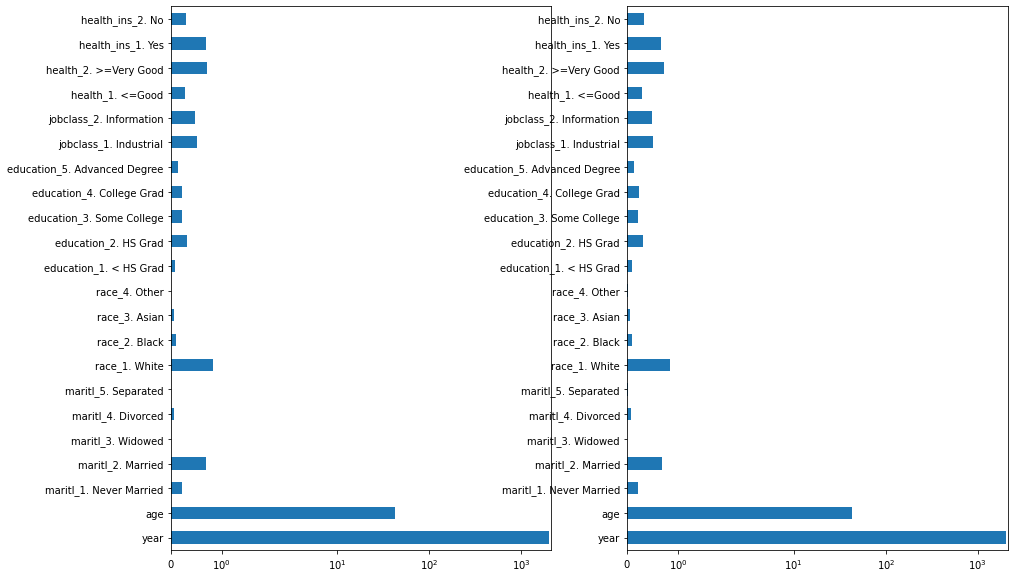

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
x_train_valid.describe().loc["mean"].plot.barh(ax=axs[0])
x_test.describe().loc["mean"].plot.barh(ax=axs[1])

axs[0].set_xscale('symlog')
axs[1].set_xscale('symlog')

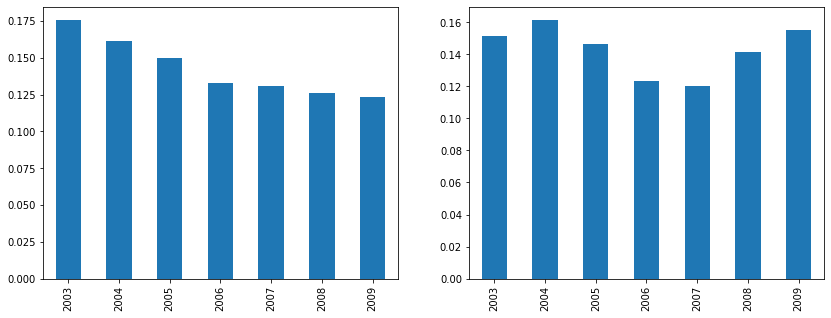

In [ ]:
# This might be a little suspicous
# Especially because year is quite important for gradient boosting (as you can see in the tutorial)
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

x_train_valid['year'].value_counts(normalize=True).sort_index().plot.bar(ax=axs[0])
x_test['year'].value_counts(normalize=True).sort_index().plot.bar(ax=axs[1]);

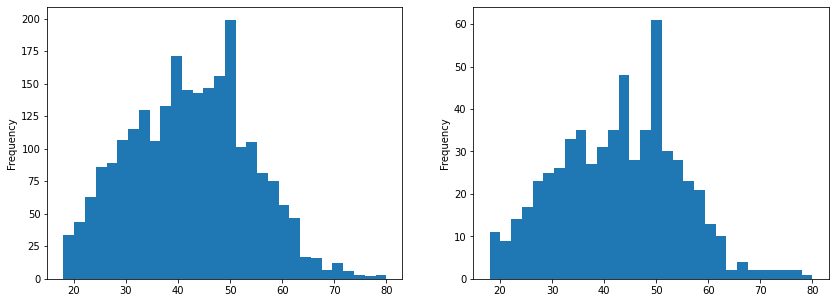

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

x_train_valid['age'].plot.hist(bins=30, ax=axs[0])
x_test['age'].plot.hist(bins=30, ax=axs[1]);